<a href="https://colab.research.google.com/github/gnidetsanna/python_for_ML_tasks/blob/main/2_3_1_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_Hnidets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



https://github.com/gnidetsanna/python_for_ML_tasks/blob/main/process_bank_churn.py

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [35]:
from process_bank_churn import *

raw_df = pd.read_csv('./train.csv')

X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = prepare_data(raw_df, apply_scaling=False)

display(raw_df)

display(X_train)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
1,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
2,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
4,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,633.0,33.0,4.0,0.00,2.0,0.0,0.0,123537.05,1.0,0.0,0.0,1.0,0.0
11996,673.0,40.0,1.0,0.00,1.0,1.0,1.0,47832.82,1.0,0.0,0.0,1.0,0.0
11997,621.0,29.0,8.0,0.00,2.0,1.0,1.0,133535.29,1.0,0.0,0.0,0.0,1.0
11998,590.0,42.0,7.0,0.00,2.0,0.0,0.0,72643.95,0.0,0.0,1.0,0.0,1.0


###Завдання 2 ###
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [15]:
import pandas as pd

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

model_no_depth = DecisionTreeClassifier(random_state=42)

model_no_depth.fit(X_train, train_targets)

train_preds = model_no_depth.predict(X_train)
val_preds = model_no_depth.predict(X_val)

print("Accuracy train :", accuracy_score(train_targets, train_preds))
print("Accuracy val: ", accuracy_score(val_targets, val_preds))

train_probs = model_no_depth.predict_proba(X_train)
val_probs = model_no_depth.predict_proba(X_val)

print("AUROC train :", roc_auc_score(train_targets, train_probs[:, 1]))
print("AUROC val :", roc_auc_score(val_targets, val_probs[:, 1]))

Accuracy train : 1.0
Accuracy val:  0.8396666666666667
AUROC train : 1.0
AUROC val : 0.7699533575691063


In [10]:
print("Depth: ", model_no_depth.get_depth())

Depth:  26


In [13]:
model_2_depth = DecisionTreeClassifier(random_state=42, max_depth=2)

model_2_depth.fit(X_train, train_targets)

train_preds = model_2_depth.predict(X_train)
val_preds = model_2_depth.predict(X_val)

print("Accuracy train :", accuracy_score(train_targets, train_preds))
print("Accuracy val: ", accuracy_score(val_targets, val_preds))

train_probs = model_2_depth.predict_proba(X_train)
val_probs = model_2_depth.predict_proba(X_val)

print("AUROC train :", roc_auc_score(train_targets, train_probs[:, 1]))
print("AUROC val :", roc_auc_score(val_targets, val_probs[:, 1]))

Accuracy train : 0.86575
Accuracy val:  0.861
AUROC train : 0.8429075368811715
AUROC val : 0.8464963303381576


In [14]:
print("Depth: ", model_2_depth.get_depth())

Depth:  2


In [17]:
model_no_depth.feature_importances_

array([0.12328311, 0.35678856, 0.05289938, 0.07919209, 0.16837899,
       0.01295742, 0.03268762, 0.12363468, 0.00712248, 0.01472481,
       0.00789588, 0.01490774, 0.00552723])

In [23]:
importnace_df = pd.DataFrame({
    "feature": X_train.columns ,
    "importance":model_no_depth.feature_importances_})

importnace_df.sort_values(axis=0 ,by="importance", ascending=False)[0:9]

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725


In [22]:
model_2_depth.feature_importances_

array([0.        , 0.71496193, 0.        , 0.        , 0.28503807,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [24]:
importnace_df = pd.DataFrame({
    "feature": X_train.columns ,
    "importance":model_2_depth.feature_importances_})

importnace_df.sort_values(axis=0 ,by="importance", ascending=False)[0:9]

,feature,importance
1,Age,0.714962
4,NumOfProducts,0.285038
0,CreditScore,0.000000
2,Tenure,0.000000
3,Balance,0.000000
5,HasCrCard,0.000000
6,IsActiveMember,0.000000
7,EstimatedSalary,0.000000
8,Geography_France,0.000000


### Висновок 2 ###

Високе значення ROC AUC для тренувального набору даних і значно нижче значення для валідаційного набору даних - спостерігаємо перетренування

###Завдання 3###
 Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [30]:
best_val_roc = 0
best_max_depth = 0
best_max_leaf_nodes = 0

max_depth_values = range(1, 21)
max_leaf_nodes_values = range(2, 51)

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        model = DecisionTreeClassifier(random_state=42, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        model.fit(X_train, train_targets)


        train_probs = model.predict_proba(X_train)
        val_probs = model.predict_proba(X_val)

        train_auroc = roc_auc_score(train_targets, train_probs[:, 1])
        val_auroc = roc_auc_score(val_targets, val_probs[:, 1])

        if val_auroc > best_val_roc:
            best_val_roc = val_auroc
            best_max_depth = max_depth
            best_max_leaf_nodes = max_leaf_nodes


print(f"Best val_roc: {best_val_roc}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")


best_model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes)
best_model.fit(X_train, train_targets)

best_train_preds = best_model.predict(X_train)
best_val_preds = best_model.predict(X_val)

print("Final Model:")
print("Accuracy train:", accuracy_score(train_targets, best_train_preds))
print("Accuracy val:", accuracy_score(val_targets, best_val_preds))

best_train_probs = best_model.predict_proba(X_train)
best_val_probs = best_model.predict_proba(X_val)

print("AUROC train:", roc_auc_score(train_targets, best_train_probs[:, 1]))
print("AUROC val:", roc_auc_score(val_targets, best_val_probs[:, 1]))

Best val_roc: 0.9249128884011248
Best max_depth: 8
Best max_leaf_nodes: 47
Final Model:
Accuracy train: 0.9086666666666666
Accuracy val: 0.8906666666666667
AUROC train: 0.9307727304431636
AUROC val: 0.9249128884011248


###Завдання 4###
 В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

,Max Depth,AUROC Train,AUROC Val
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933778,0.921111
6,7,0.941535,0.914449
7,8,0.949541,0.902790
8,9,0.959079,0.884709
9,10,0.969765,0.848436


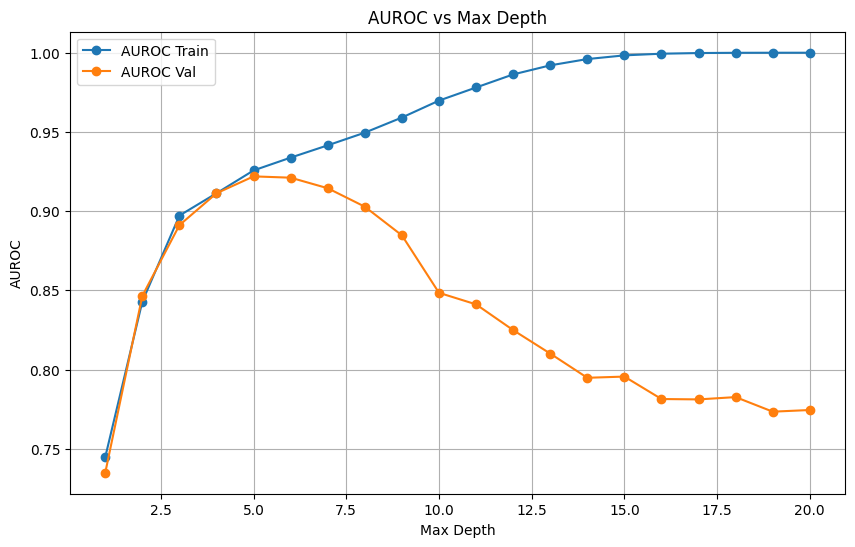

In [29]:
import matplotlib.pyplot as plt

max_depth_values = range(1, 21)

results = []

for max_depth in max_depth_values:

        model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        model.fit(X_train, train_targets)

        train_probs = model.predict_proba(X_train)
        val_probs = model.predict_proba(X_val)

        train_auroc = roc_auc_score(train_targets, train_probs[:, 1])
        val_auroc = roc_auc_score(val_targets, val_probs[:, 1])

        results.append([max_depth, train_auroc, val_auroc])

results_df = pd.DataFrame(results, columns=['Max Depth', 'AUROC Train', 'AUROC Val'])

display(results_df)

plt.figure(figsize=(10, 6))
plt.plot(results_df['Max Depth'], results_df['AUROC Train'], label='AUROC Train', marker='o')
plt.plot(results_df['Max Depth'], results_df['AUROC Val'], label='AUROC Val', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('AUROC')
plt.title('AUROC vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

###Завдання 5###
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [58]:
from process_bank_churn import *

test_df = pd.read_csv('./test.csv')

test_model = DecisionTreeClassifier(random_state=42, max_depth=8, max_leaf_nodes=47)

test_model.fit(X_train, train_targets)

X_test = process_new_data(test_df, input_cols, scaler, encoder)

preds = test_model.predict_proba(X_test)[:,1]

In [59]:
X_test['Exited'] = preds

In [60]:
sub_csv = pd.DataFrame({
    "id": test_df.id,
    "Exited": preds
})


sub_csv.to_csv('submission.csv', index=False)

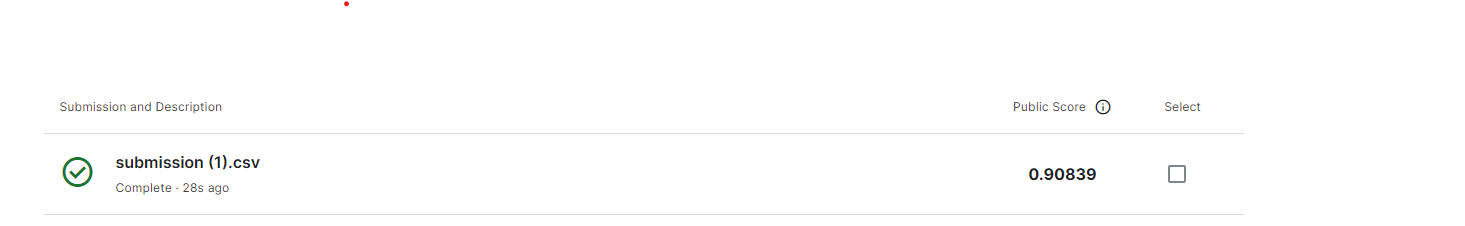